# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations and Analysis


In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Set the main path
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = ["London", "Paris", "Detroit"]
#cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]
# Get all the temperatures in Fahrenheit
units = "imperial"

# Build partial query URL path
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Create empty lists to hold the data being returned
city_name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beginning data retrieval")
print("----------------------------------")
    
# Loop through the cities to get their info and populate their respective lists
for city in cities:
    response = requests.get(query_url + city).json()

    # In case data is missing in any of the parameters, using a try/except
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing record {cities.index(city)+1} | {city}")
    except:
        print("City data missing--skipping")
        pass
print("----------------------------------")
print("Data Retrieval is complete")
print("----------------------------------")

#print(temp) 
#print(humidity)
#print(cloudiness)
#print(wind_speed)
#print(country)
#print(date)
    
# Get weather data
##weather_response = requests.get(query_url).json()
# weather_json = weather_response.json()
##weather_response_json = json.dumps(weather_response, indent=4)
#print(f"The weather API responded with: {weather_response}.")
##print(weather_response_json)

# Build query URL
#query_url = f'{url}appid={api_key}&q={city}'
#response = requests.get(query_url).json()
#print(json.dumps(response, indent=4))

        

        

Beginning data retrieval
----------------------------------
Processing record 1 | westport
Processing record 2 | albany
Processing record 3 | newport
City data missing--skipping
Processing record 5 | hithadhoo
Processing record 6 | tucuman
City data missing--skipping
Processing record 8 | kristiansund
Processing record 9 | berlevag
Processing record 10 | ushuaia
Processing record 11 | ribeira grande
Processing record 12 | rikitea
Processing record 13 | severo-kurilsk
Processing record 14 | longyearbyen
Processing record 15 | sassandra
Processing record 16 | vanimo
Processing record 17 | soyo
Processing record 18 | khatanga
Processing record 19 | avarua
Processing record 20 | inverell
Processing record 21 | punta arenas
Processing record 22 | dikson
Processing record 23 | rabo de peixe
Processing record 24 | humaita
Processing record 25 | casablanca
Processing record 26 | kapaa
Processing record 27 | gat
Processing record 28 | busselton
Processing record 29 | abha
Processing record 30 |

Processing record 252 | luderitz
Processing record 253 | atuona
Processing record 254 | lorengau
Processing record 255 | taoudenni
Processing record 256 | tromso
Processing record 257 | loandjili
Processing record 258 | douglas
Processing record 259 | saint george
Processing record 260 | misratah
Processing record 261 | padang
Processing record 262 | asau
Processing record 263 | vestmanna
Processing record 264 | parkes
Processing record 265 | atikokan
Processing record 266 | ginir
City data missing--skipping
Processing record 268 | kaitangata
Processing record 269 | liku
Processing record 270 | mahibadhoo
Processing record 271 | colac
Processing record 272 | talnakh
Processing record 273 | kon tum
Processing record 274 | nemuro
Processing record 275 | roebourne
Processing record 276 | nkhotakota
Processing record 277 | la ronge
Processing record 278 | tuatapere
Processing record 279 | takoradi
Processing record 280 | irbit
Processing record 281 | mehamn
Processing record 282 | gland
Pr

Processing record 501 | togur
Processing record 502 | shache
Processing record 503 | verkhnyaya inta
Processing record 504 | caranavi
Processing record 505 | trier
Processing record 506 | mykolayiv
Processing record 507 | aldan
Processing record 508 | huarmey
Processing record 509 | ilulissat
City data missing--skipping
Processing record 511 | rocha
Processing record 512 | santa lucia
Processing record 513 | geraldton
Processing record 514 | bidar
City data missing--skipping
Processing record 516 | hanyang
Processing record 517 | ialibu
Processing record 518 | kungurtug
Processing record 519 | ndele
Processing record 520 | tambopata
Processing record 521 | jiexiu
Processing record 522 | wagar
Processing record 523 | parham
Processing record 524 | taber
Processing record 525 | tongchuan
Processing record 526 | paranaiba
Processing record 527 | zwedru
Processing record 528 | davila
Processing record 529 | chimbote
Processing record 530 | ambon
Processing record 531 | muktsar
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Make sure all the counts are the same
print(f"City: {len(city_name)}")
print(f"Lat: {len(lat)}")
print(f"Lng: {len(lng)}")
print(f"Temp: {len(temp)}")
print(f"Humidity: {len(humidity)}")
print(f"Cloudiness: {len(cloudiness)}")
print(f"Wind Speed: {len(wind_speed)}")
print(f"Country: {len(country)}")
print(f"Date: {len(date)}")


City: 543
Lat: 543
Lng: 543
Temp: 543
Humidity: 543
Cloudiness: 543
Wind Speed: 543
Country: 543
Date: 543


In [40]:
# Create a dictionary using all the newly populated lists
data_dict = {"City": city_name,
            "Lat": lat,
            "Lng": lng,
            "Temp": temp,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Country": country,
            "Date": date}

# Create a dataframe from the dictionary
city_weather_df = pd.DataFrame(data_dict)

# Double-check the counts are all the same
city_weather_df.count()

City          543
Lat           543
Lng           543
Temp          543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [41]:
# Export the City_Data into a csv
city_weather_df.to_csv(output_data_file)

# Display the dataframe
city_weather_df

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Westport,41.14,-73.36,79.63,61,1,10.29,US,1596326773
1,Albany,42.60,-73.97,78.21,53,76,1.10,US,1596326822
2,Newport,51.59,-3.00,55.98,83,7,6.26,GB,1596326823
3,Hithadhoo,-0.60,73.08,82.62,74,16,11.54,MV,1596326823
4,San Miguel de Tucumán,-26.82,-65.22,66.20,39,0,3.36,AR,1596326823
...,...,...,...,...,...,...,...,...,...
538,Tsimlyansk,47.65,42.10,62.29,69,4,1.59,RU,1596326957
539,Burnie,-41.07,145.92,52.84,73,45,5.99,AU,1596326957
540,Kindersley,51.47,-109.17,82.40,30,20,10.29,CA,1596326957
541,Río Cuarto,-33.13,-64.35,71.60,43,84,23.04,AR,1596326958


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
# Check to see if there are any rows with a Huidity > 100
high_humidity = city_weather_df.loc[city_weather_df["Humidity"] > 100]
high_humidity.describe()

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#  Get the indices of cities that have humidity over 100%.
idx = city_weather_df.index[city_weather_df["Humidity"] > 100]
idx

Int64Index([], dtype='int64')

In [59]:
# Make a new DataFrame equal to the city data to drop all humidity outliers.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.loc[city_weather_df["Humidity"] <= 100]
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Westport,41.14,-73.36,79.63,61,1,10.29,US,1596326773
1,Albany,42.60,-73.97,78.21,53,76,1.10,US,1596326822
2,Newport,51.59,-3.00,55.98,83,7,6.26,GB,1596326823
3,Hithadhoo,-0.60,73.08,82.62,74,16,11.54,MV,1596326823
4,San Miguel de Tucumán,-26.82,-65.22,66.20,39,0,3.36,AR,1596326823
...,...,...,...,...,...,...,...,...,...
538,Tsimlyansk,47.65,42.10,62.29,69,4,1.59,RU,1596326957
539,Burnie,-41.07,145.92,52.84,73,45,5.99,AU,1596326957
540,Kindersley,51.47,-109.17,82.40,30,20,10.29,CA,1596326957
541,Río Cuarto,-33.13,-64.35,71.60,43,84,23.04,AR,1596326958


In [61]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

# Output File (CSV)
output_clean_data_file = "output_data/City_Data.csv"
clean_city_data.to_csv(output_clean_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

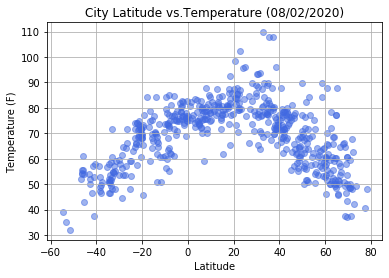

Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and its temperature in Fahrenheit along the y-axis. It's purpose is to visually show if there could potentially be a relationship between the two variables. The darker the blue, the more cities with similiar latitude/temperature pairs.


In [91]:
# Get the date of the data. Averaging them to get one date.
# Got help for this from Jeff's response at:
#https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe
data_datetime = pd.to_datetime(clean_city_data["Date"],unit='s').mean()

plt.scatter(clean_city_data['Lat'],clean_city_data['Temp'],
            c="royalblue",  alpha=0.5)
plt.title(f"City Latitude vs.Temperature ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.show()
print("Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and \
its temperature in Fahrenheit along the y-axis. It's purpose is to visually show if there could potentially be a relationship \
between the two variables. The darker the blue, the more cities with similiar latitude/temperature pairs.")

## Latitude vs. Humidity Plot

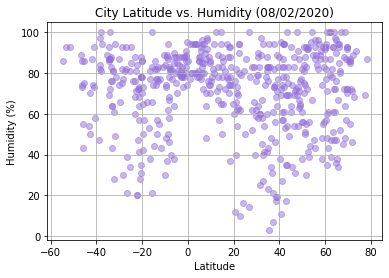

Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and its humidity along the y-axis. It is to show if there could be a relationship between where a city is located and its humidity.


In [88]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],
            c="mediumpurple",  alpha=0.5)
plt.title(f"City Latitude vs. Humidity ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
print("Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and \
its humidity along the y-axis. It is to show if there could be a relationship between where a city is located and its humidity.")

## Latitude vs. Cloudiness Plot

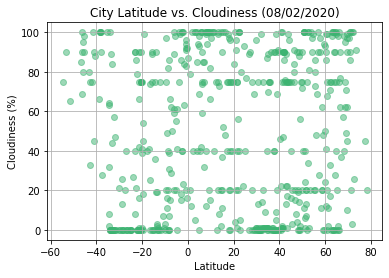

Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and its percentage of cloudiness along the y-axis. It's to visually help determine if there could be a relationship between where a city is located and its cloudiness.


In [89]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],
            c="mediumseagreen",  alpha=0.5)
plt.title(f"City Latitude vs. Cloudiness ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
print("Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and \
its percentage of cloudiness along the y-axis. It's to visually help determine if there could be a relationship between where \
a city is located and its cloudiness.")

## Latitude vs. Wind Speed Plot

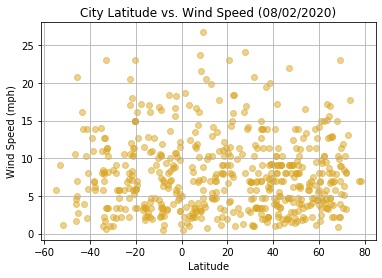

Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and its wind speed along the y-axis. It's to visually help determine if there could be a relationship between where a city is located and the speed the wind is blowing there.


In [139]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],
            c="goldenrod",  alpha=0.5)
plt.title(f"City Latitude vs. Wind Speed ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
print("Each dot in this scatter plot represents a city; its location is determined by its latitude along the x-axis and \
its wind speed along the y-axis. It's to visually help determine if there could be a relationship between where \
a city is located and the speed the wind is blowing there.")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [122]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] >= 0])

south_hemi_df = pd.DataFrame(clean_city_data.loc[clean_city_data["Lat"] < 0])


-0.32

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4398784785873125


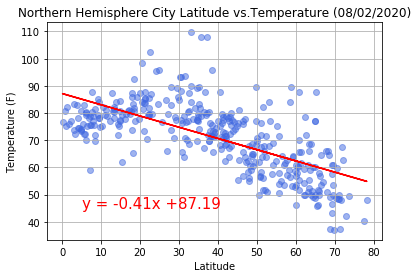

In [108]:
# Perform a linear regression on latitude vs. temperature
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create the plot
plt.scatter(north_hemi_df['Lat'],north_hemi_df['Temp'], c="royalblue",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Northern Hemisphere City Latitude vs.Temperature ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/NorthernHemisphere_Lat_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6191821343384276


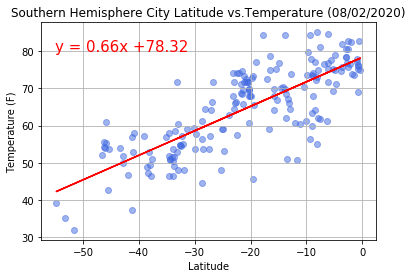

In [114]:
# Perform a linear regression on latitude vs. temperature
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create the plot
plt.scatter(south_hemi_df['Lat'],south_hemi_df['Temp'], c="royalblue",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Southern Hemisphere City Latitude vs.Temperature ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/SouthernHemisphere_Lat_Temp.png")
plt.show()

#### Northern and Southern Hemisphere Temp vs. Latitude Linear Regression Analysis

The linear regression in both the northern and southern hemiphere plots is showing that the closer a city is to the \
Equator, the warmer its temperature is likely to be. There's a stronger correlation between tempperature and latitude in the \
southern hemisphere but that may be partly due to having more data points to plot in the northern hemisphere plot and just \
the randomness of the chosen cities. The correlation in both would warrant further analysis.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006685375234752377


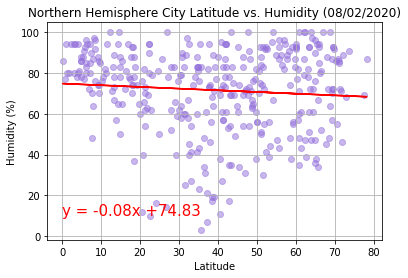

In [125]:
# Perform a linear regression on latitude vs. humidity
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create the plot
plt.scatter(north_hemi_df['Lat'],north_hemi_df['Humidity'], c="mediumpurple",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/NorthernHemisphere_Lat_Humidity.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.0265620909948318e-07


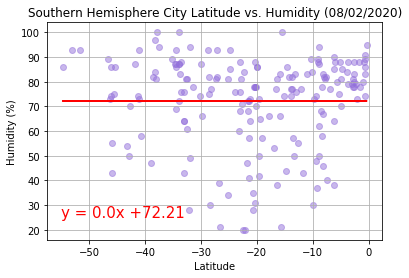

In [131]:
# Perform a linear regression on latitude vs. humidity
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(south_hemi_df['Lat'],south_hemi_df['Humidity'], c="mediumpurple",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Southern Hemisphere City Latitude vs. Humidity ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/SouthernHemisphere_Lat_Humidity.png")

plt.show()

#### Northern and Southern Hemisphere Humidity vs. Latitude Linear Regression Analysis

Based on the 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0019204368526208023


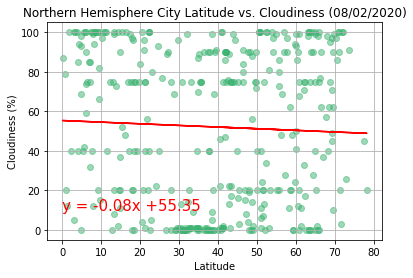

In [135]:
# Perform a linear regression on latitude vs. cloudiness
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create the plot
plt.scatter(north_hemi_df['Lat'],north_hemi_df['Cloudiness'], c="mediumseagreen",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/NorthernHemisphere_Lat_Cloudiness.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0049848039331910265


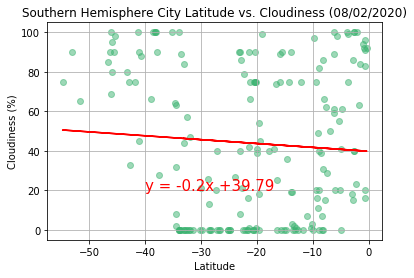

In [136]:
# Perform a linear regression on latitude vs. cloudiness
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

# Create the plot
plt.scatter(south_hemi_df['Lat'],south_hemi_df['Cloudiness'], c="mediumseagreen",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/SouthernHemisphere_Lat_Cloudiness.png")

plt.show()

#### Northern and Southern Hemisphere Cloudiness vs. Latitude Linear Regression Analysis

Based on the 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002154106952460898


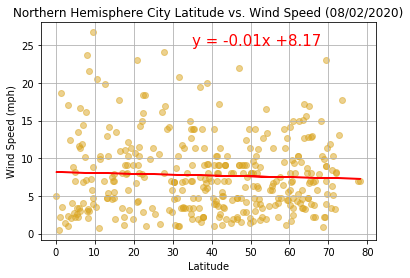

In [142]:
# Perform a linear regression on latitude vs. wind speed
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(north_hemi_df['Lat'],north_hemi_df['Wind Speed'], c="goldenrod",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(35,25),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/NorthernHemisphere_Lat_WindSpeed.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 7.135802701465572e-05


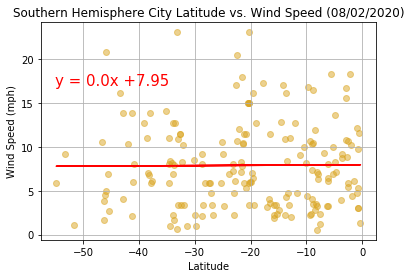

In [145]:
# Perform a linear regression on latitude vs. wind speed
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot
plt.scatter(south_hemi_df['Lat'],south_hemi_df['Wind Speed'], c="goldenrod",  alpha=0.5)
plt.plot(x_values,regress_values,"r-")

# Add labels and annotate the line equation
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed ({data_datetime:%m/%d/%Y})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")
plt.grid()

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save an image of the plot and show on screen
plt.savefig("images/SouthernHemisphere_Lat_WindSpeed.png")

plt.show()

#### Northern and Southern Hemisphere Wind Speed vs. Latitude Linear Regression Analysis

Based on the 